#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imageio import imread
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Model, Sequential
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.python.keras.backend import set_session

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
tf.keras.backend.clear_session()

import sys
sys.path.append('..')
import src.notebook_helpers as notebook_helpers

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


#### Load in validation data

In [2]:

val_generator = notebook_helpers.load_val_generator()
# image_size = 200
# batch_size = 32
# valgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=notebook_helpers.predict_custom_image) 
# val_generator = valgen.flow_from_directory(
#                 validation_path,  # directory for validation images
#                 target_size=(image_size, image_size),
#                 batch_size=batch_size,
#                 class_mode='categorical',
#                 color_mode='grayscale',
#                 shuffle=False)


Found 30 images belonging to 29 classes.


In [3]:
edger = notebook_helpers.load_saved_model('edge_detect/unet2.keras')
classifier = notebook_helpers.load_saved_model('model19.keras')
graph = tf.get_default_graph()
sess = keras.backend.get_session()
init = tf.global_variables_initializer()
sess.run(init)


running
running


In [4]:
classifier.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 128)     1280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5120000)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 29)                148480029 
Total params: 148,481,309
Trainable params: 148,481,309
Non-trainable params: 0
_________________________________________________________________


#### Edge detection quick look

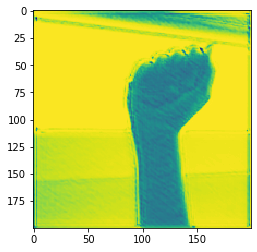

In [5]:
global graph
global sess
with graph.as_default():
    set_session(sess)
    plt.imshow(array_to_img(val_generator[0][0][0]))
    

#### Load in our classifier model

In [15]:
dict(zip(classifier.metrics_names,classifier.evaluate_generator(val_generator)))


{'loss': 3.967289447784424,
 'accuracy': 0.03333333507180214,
 'mae': 0.06658738106489182,
 'mse': 0.03329367935657501}

In [12]:
del classifier


In [ ]:
preds = []
for pred in classifier.predict_generator(val_generator, verbose=1):
    preds.append(np.argmax(pred) + 1)
true = val_generator.classes

In [35]:
print(list(true))
print(preds)

[1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 28]
[6, 10, 14, 14, 10, 14, 3, 6, 6, 6, 6, 6, 6, 10, 3, 14, 18, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
